In [ ]:
import numpy 
import scipy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline
from matplotlib import cm, animation
from IPython.display import HTML


from math import * 


In [1]:
N=101
L=1.0
nt = 100  
y=numpy.linspace(-L,L,N)
dy=2*L/(N-1)



NameError: name 'numpy' is not defined

[0.00015771+0.j 0.00035425+0.j 0.00062834+0.j 0.00097887+0.j
 0.00140447+0.j 0.00190346+0.j 0.00247387+0.j 0.00311344+0.j
 0.00381966+0.j 0.00458974+0.j 0.00542063+0.j 0.00630906+0.j
 0.00725152+0.j 0.00824429+0.j 0.00928346+0.j 0.01036493+0.j
 0.01148441+0.j 0.01263751+0.j 0.01381966+0.j 0.0150262 +0.j
 0.01625237+0.j 0.01749334+0.j 0.01874419+0.j 0.02      +0.j
 0.02125581+0.j 0.02250666+0.j 0.02374763+0.j 0.0249738 +0.j
 0.02618034+0.j 0.02736249+0.j 0.02851559+0.j 0.02963507+0.j
 0.03071654+0.j 0.03175571+0.j 0.03274848+0.j 0.03369094+0.j
 0.03457937+0.j 0.03541026+0.j 0.03618034+0.j 0.03688656+0.j
 0.03752613+0.j 0.03809654+0.j 0.03859553+0.j 0.03902113+0.j
 0.03937166+0.j 0.03964575+0.j 0.03984229+0.j 0.03996053+0.j
 0.04      +0.j 0.03996053+0.j 0.03984229+0.j 0.03964575+0.j
 0.03937166+0.j 0.03902113+0.j 0.03859553+0.j 0.03809654+0.j
 0.03752613+0.j 0.03688656+0.j 0.03618034+0.j 0.03541026+0.j
 0.03457937+0.j 0.03369094+0.j 0.03274848+0.j 0.03175571+0.j
 0.03071654+0.j 0.029635

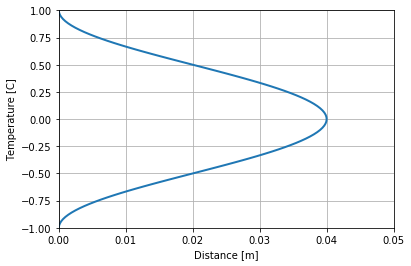

In [413]:
vinit=numpy.empty(N,dtype=numpy.complex_)
for i in range(N):
    vinit[i]=0.02*(1+cos(pi*y[i]))
    
vinit[0]=0
vinit[N-1]=0
vinit[1]=vinit[2]/4
vinit[N-2]=vinit[N-3]/4 



# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(abs(vinit), y, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, 0.05)
pyplot.ylim(-L, L);

In [414]:
# Operator of the second derivative acting on v with respect to y 
def D2_v(N,dy):

    # Setup the diagonal of the operator.
    D = numpy.diag((-2.0) * numpy.ones(N-4))
    # Setup the upper diagonal of the operator.
    U = numpy.diag(1.0 * numpy.ones(N - 5), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(1.0 * numpy.ones(N - 5), k=-1)
    
    D[0][0] = -7/4
    D[N-5][N-5] = -7/4
    
    # Assemble the operator.
    D2_v = D + U + L
    D2_v = ((1/dy)**2)*D2_v
    
    
    return D2_v

print(D2_v(101,0.02))

[[-4375.  2500.     0. ...     0.     0.     0.]
 [ 2500. -5000.  2500. ...     0.     0.     0.]
 [    0.  2500. -5000. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ... -5000.  2500.     0.]
 [    0.     0.     0. ...  2500. -5000.  2500.]
 [    0.     0.     0. ...     0.  2500. -4375.]]


In [415]:
# Operator of the fourth derivative acting on v with respect to y 
def D4_v(N,dy):
    
    
    # Setup the diagonal of the operator.
    D = numpy.diag((6.0) * numpy.ones(N-4))
    # Setup the upper diagonal of the operator.
    U = numpy.diag(-4.0 * numpy.ones(N - 5), k=1)
    # Setup the lower diagonal of the operator.
    L = numpy.diag(-4.0 * numpy.ones(N - 5), k=-1)
    # Setup the upper+1 diagonal of the operator.
    U2 = numpy.diag(1.0 * numpy.ones(N - 6), k=2)
    # Setup the lower-1 diagonal of the operator.
    L2 = numpy.diag(1.0 * numpy.ones(N - 6), k=-2)
    
    # Assemble the operator.
    D4_v = D + U + L + U2 + L2
    
    D4_v[0][0] = 5
    D4_v[N-5][N-5] = 5
    
    D4_v[1][0] = -15/4
    D4_v[N-6][N-5] = -15/4
    
    D4_v = ((1/dy)**4)*D4_v
    
    return D4_v

print(D4_v(101,0.02))
    

[[ 31250000. -25000000.   6250000. ...         0.         0.         0.]
 [-23437500.  37500000. -25000000. ...         0.         0.         0.]
 [  6250000. -25000000.  37500000. ...         0.         0.         0.]
 ...
 [        0.         0.         0. ...  37500000. -25000000.   6250000.]
 [        0.         0.         0. ... -25000000.  37500000. -23437500.]
 [        0.         0.         0. ...   6250000. -25000000.  31250000.]]


In [416]:
def L_v(N,y,dy,R,alpha):
    
    D2 = D2_v(N,dy)
    D4 = D4_v(N,dy)
    
    A=(D2-alpha**2*numpy.identity(N-4))
    K=linalg.inv(A)
    
    
    y2=numpy.zeros(N)
    for i in range(N):
        y2[i]=1-(y[i]*y[i])
    
    #U= y2[2:-2]*numpy.identity(N-4)
    U= numpy.diag(y2[2:-2])
    U2= -2*numpy.identity(N-4)
    
    L = K.dot( (-1j*alpha*U.dot(A)) + 1j*alpha*U2 + (1/R)*(D4-2*alpha*alpha*D2 + numpy.identity(N-4)*alpha**4) )
    
    #L= K*(-1j*alpha*U*A+ 1j*alpha*U2+ 1/R*(D4_v(N,dy)-2*alpha**2*D2_v(N,dy)+alpha**4*numpy.identity(N-4)))
                             
    return L

In [417]:
"""Cette fonction intégre le système d'EDO d'ordre 2 avec les paramètres suivants:
    - fonction : désigne la fonction de définition du système
    - dom : désigne le domaine d'intégration du système
    - df= temps final 
    - xini, yini : conditions initiales du système
    - dt : pas d'intégration sur le domaine La fonction retourne deux listes contenant les (xi,yi)
          de la courbe intégrale"""

"Cette fonction intégre le système d'EDO d'ordre 2 avec les paramètres suivants:\n    - fonction : désigne la fonction de définition du système\n    - dom : désigne le domaine d'intégration du système\n    - df= temps final \n    - xini, yini : conditions initiales du système\n    - dt : pas d'intégration sur le domaine La fonction retourne deux listes contenant les (xi,yi)\n          de la courbe intégrale"

In [418]:
"""# définition de la fonction RK4

def RK4Sys2(operator, df, vinit, dt):
    
    v= numpy.zeros(N-4,dtype=numpy.complex_)
    v[:]= vinit[2:-2]+1j*numpy.zeros(N-4,dtype=numpy.complex_)
    
    v = vinit.copy()
  
    for t in range (int(df/dt)+1):
        k1 = dt*operator.dot(v)
        k2 = dt*operator.dot(v + k1/2.0)
        k3 = dt*operator.dot(v + k2/2.0)
        k4 = dt*operator.dot(v + k3)
        v += (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    
    
    v_return = numpy.zeros(N,dtype=numpy.complex_)
    v_return[2:-2] = v
    v_return[0] = 0
    v_return[1] = v_return[2]/4
    v_return[N-1] = 0
    v_return[N-2] = v_return[N-3]/4
    
    
    return (v)

#je construis la fonction qui définit l'équation différentielle à intégrer
#permet d'intégrer sur t l'equa diff (d/dt) v = L*v  """"

SyntaxError: EOL while scanning string literal (<ipython-input-418-728d7d904051>, line 29)

In [419]:
# définition de la fonction RK4

def RK4Sys2(operator, df, vinit, dt):
    
    v=vinit.copy()
    #v= numpy.zeros(N-4,dtype=numpy.complex_)
    #v[:]= vinit[:]+1j*numpy.zeros(N-4,dtype=numpy.complex_)
    for t in range (int(df/dt)):
        k1 = dt*operator.dot(v)
        k2 = dt*operator.dot(v + k1/2.0)
        k3 = dt*operator.dot(v + k2/2.0)
        k4 = dt*operator.dot(v + k3)
        v += (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    
    return (v)

#je construis la fonction qui définit l'équation différentielle à intégrer
#permet d'intégrer sur t l'equa diff (d/dt) v = L*v 

v( 0.5 ) =  (0.0077285235607835335-0.012394369382355242j)
75


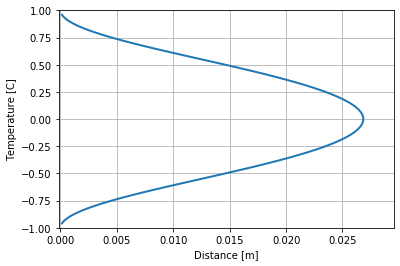

In [420]:
R = 500   # angle initial
alpha = 0.3    # vitesse angulaire initiale

# définition du domaine d'intégration
df = 10
dt = 0.01
N=101 
y=numpy.linspace(-L,L,N)
dy=2*L/(N-1)


#Puis j'intègre l'équation différentielle avec RK4
# intégration du système par RK4
vfunc = RK4Sys2(L_v(N,y,dy,R,alpha),df,vinit[2:-2],dt)


# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(abs(vfunc), y[2:-2], color='C0', linestyle='-', linewidth=2)
pyplot.xlim(min(abs(vfunc))-max(abs(vfunc))/100, max(abs(vfunc))+max(abs(vfunc))/10)
pyplot.ylim(-L, L);

print('v(',y[numpy.argmin(abs(y-0.5))],') = ',vfunc[numpy.argmin(abs(y-0.5))-2])
print(numpy.argmin(abs(y-0.5)))

Erreur maximale: 3.1031676915590914e-17


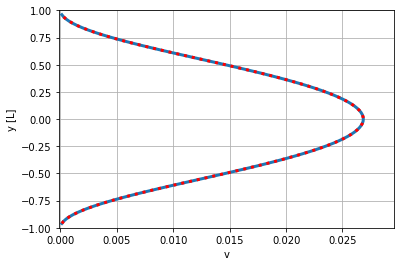

In [421]:
Xinit = numpy.identity(N-4,dtype=numpy.complex_)
Xfunc = RK4Sys2(L_v(N,y,dy,R,alpha),df,Xinit,dt)

v_prop = Xfunc.dot(vinit[2:-2])

# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('v')
pyplot.ylabel('y [L]')
pyplot.grid()
pyplot.plot(abs(vfunc), y[2:-2], color='C0', linestyle='-', linewidth=3)
pyplot.plot(abs(v_prop), y[2:-2], color='red', linestyle=':', linewidth=3)
pyplot.xlim(min(abs(v_prop))-max(abs(v_prop))/100, max(abs(v_prop))+max(abs(v_prop))/10)
pyplot.ylim(-L, L);



print('Erreur maximale:', max(abs(v_prop-vfunc)))

In [422]:
u,s,vh = numpy.linalg.svd(Xfunc)
print(numpy.amax(s))
print(numpy.linalg.norm(Xfunc))

3.304238341476203
3.58122896147204


In [423]:
n_alpha = 25

a_min = 0
a_max = 2*pi

a=numpy.linspace(a_min,a_max,n_alpha)

s_max = numpy.zeros(n_alpha)


Xinit = numpy.identity(N-4,dtype=numpy.complex_)

for i in range(n_alpha):
    u,s,vh = numpy.linalg.svd(RK4Sys2(L_v(N,y,dy,R,a[i]),df,Xinit,dt))
    s_max[i] = max(abs(s))
    
print(s_max)



[ 1.50418599  2.99675622  5.07265057  6.95325696  8.6092125   9.84446585
 10.27855392  9.65109831  8.08428376  6.07901462  4.2762197   3.12488885
  2.56321101  2.21557981  1.89882131  1.61260708  1.37750379  1.18730939
  1.02835672  0.89306626  0.77767821  0.67899524  0.59413778  0.52082865
  0.45726815]


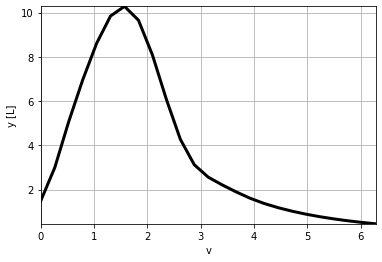

In [424]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('v')
pyplot.ylabel('y [L]')
pyplot.grid()
pyplot.plot(a, s_max, color='black', linestyle='-', linewidth=3)
pyplot.xlim(a[0], a[n_alpha-1])
pyplot.ylim(min(s_max), max(s_max));

In [427]:
n_alpha = 25

a_min_raf = 1.2
a_max_raf = 2.0

a_raf=numpy.linspace(a_min_raf,a_max_raf,n_alpha)

s_max_raf = numpy.zeros(n_alpha)


Xinit = numpy.identity(N-4,dtype=numpy.complex_)

for i in range(n_alpha):
    u,s,vh = numpy.linalg.svd(RK4Sys2(L_v(N,y,dy,R,a_raf[i]),df,Xinit,dt))
    s_max_raf[i] = max(abs(s))
    
print(max(s_max_raf))

10.279682130303435


In [ ]:
print(max(s_max_raf))
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('v')
pyplot.ylabel('y [L]')
pyplot.grid()
pyplot.plot(a_raf, s_max_raf, color='black', linestyle='-', linewidth=3)
pyplot.xlim(a_raf[0], a_raf[n_alpha-1])
pyplot.ylim(min(s_max_raf), max(s_max_raf)+1/10);

In [281]:
n_loop = 4
n = 1

n_a_while = 15

a_min_while = 0
a_max_while = 2*pi

s_max_while = numpy.zeros(n_a_while)

Xinit = numpy.identity(N-4,dtype=numpy.complex_)

while (n<=n_loop):
    
    a_while=numpy.linspace(a_min_while,a_max_while,n_a_while)
    
    for i in range(n_a_while):
        u,s,vh = numpy.linalg.svd(RK4Sys2(L_v(N,y,dy,R,a_while[i]),df,Xinit,dt))
        s_max_while[i] = max(abs(s))
        
    a_sup = a_while[numpy.argmax(s_max_while)]
    delta = (a_max_while - a_min_while)/5
    
    if (a_sup - delta < 0):
        a_min_while = 0
    else :
        a_min_while = a_sup - delta
    if (a_sup + delta > 2*pi):
        a_max_while = 2*pi
    else:
        a_max_while = a_sup + delta
        
    n += 1
    


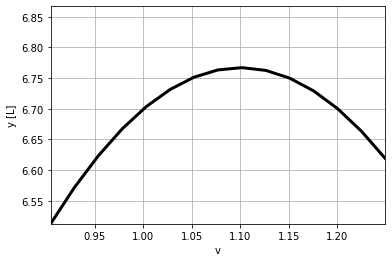

In [282]:
# Plot the temperature along the rod.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('v')
pyplot.ylabel('y [L]')
pyplot.grid()
pyplot.plot(a_while, s_max_while, color='black', linestyle='-', linewidth=3)
pyplot.xlim(a_while[0], a_while[n_a_while-1])
pyplot.ylim(min(s_max_while), max(s_max_while)+1/10);

In [338]:
# définition de la fonction RK4

def RK4Sys2_hist(operator, df, vinit, dt):
    
    v_hist=[abs(vinit.copy())]
    v=vinit.copy()
    #v= numpy.zeros(N-4,dtype=numpy.complex_)
    #v[:]= vinit[:]+1j*numpy.zeros(N-4,dtype=numpy.complex_)
  
    for t in range (int(df/dt)):
        k1 = dt*operator.dot(v)
        k2 = dt*operator.dot(v + k1/2.0)
        k3 = dt*operator.dot(v + k2/2.0)
        k4 = dt*operator.dot(v + k3)
        v += (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
        v_hist.append(abs(v.copy()))
    
    
    return (v_hist)

#je construis la fonction qui définit l'équation différentielle à intégrer
#permet d'intégrer sur t l'equa diff (d/dt) v = L*v 

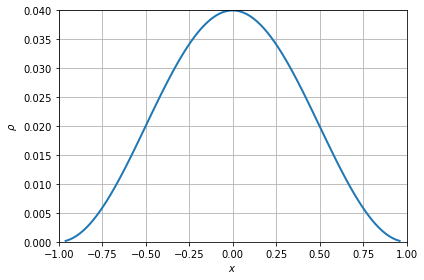

In [342]:
# Compute the traffic density at all time steps.
v_hist = RK4Sys2_hist(L_v(N,y,dy,R,alpha),df,vinit[2:-2],dt)

def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])
    
    
    
# Plot the initial traffic density.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(y[2:-2], abs(vinit[2:-2]), 
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(-L, L)
pyplot.ylim(0, 0.04)
pyplot.tight_layout()



In [343]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=int(df/dt), fargs=(v_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())